In [35]:
import pandas as pd

columns = ['Party','HC_Infants','Water_Cost_Sharing',
           'Budget_Resolution','Dr_Fee_Freeze','SLV_Aid',
           'Religious_in_Schools','Anti-Sat_Test_Ban','Aid_Contras',
           'mx-missle','immigration','synfuels_cutback','ed_spending',
           'superfund_sue','crime','duty_free', 'SA_export'
          ]

voting_data = pd.read_csv('congressional_voting_records.csv', 
                          header = None, names = columns)

voting_data.head()

,Party,HC_Infants,Water_Cost_Sharing,Budget_Resolution,Dr_Fee_Freeze,SLV_Aid,Religious_in_Schools,Anti-Sat_Test_Ban,Aid_Contras,mx-missle,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free,SA_export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Challenge 1

In [36]:
mapping_dict = {'y': 1, 'n': 0, '?':'?'}

for i in voting_data.columns[1:]:
    no_count = voting_data[voting_data[i]=='n'].count()['Party']
    yes_count = voting_data[voting_data[i]=='y'].count()['Party']
    mapping_dict['?']=format(yes_count/float(no_count+yes_count),'.3f')
    voting_data[i]=voting_data[i].map(mapping_dict)
    
voting_data.head()

,Party,HC_Infants,Water_Cost_Sharing,Budget_Resolution,Dr_Fee_Freeze,SLV_Aid,Religious_in_Schools,Anti-Sat_Test_Ban,Aid_Contras,mx-missle,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free,SA_export
0,republican,0,1,0,1,1,1,0,0,0,1,0.362,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0.813
2,democrat,0.442,1,1,0.417,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0.505,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0.423,1,1,1,1


## Challenge 2

In [38]:
from sklearn.cross_validation import train_test_split as tts

X_train, X_test, y_train, y_test = tts(voting_data[voting_data.columns[1:]], voting_data['Party'],
                                                    test_size=0.33, random_state=42)

## Challenge 3

In [43]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

accuracies = []
r = range(1,21)
for i in r:
    neigh = knn(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    a = accuracy_score(neigh.predict(X_test),y_test)
    accuracies.append(a)

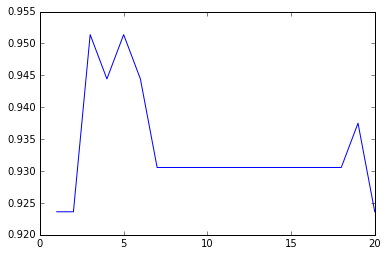

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(r,accuracies)

## Challenge 4

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
results = model.fit(X_train,y_train)

print accuracy_score(results.predict(X_test),y_test)

0.972222222222
